# Data Wrangling 3
Coded by Tanner Frahm

In [114]:
# Import needed packages
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3

In [3]:
# Load in Data Set
df = pd.read_csv('/users/tfrahm/OneDrive - University of Utah/school/u_of_u/2024_spring/Data_Wrangling/Module 4/Assignment 3/DW3_set_exercise.csv')

In [10]:
diabetes_codes = ['E08','E09','E10','E11','E13']
covid_codes = ['U07.1','J12.82']

#### Question 1
Diabetes Set: (20 Points)
a. Find all patients with Diabetes using the codes above by listing their patient IDs.
b. Find the cardinality of the Diabetes set.

In [67]:
# Part A
diabetes_pts = df[df['Diagnosis Code'].isin(diabetes_codes)].drop_duplicates(subset=['Patient ID'],keep = False)
diabetes_pts['Patient ID']

13       1841379.0
15       6120921.0
19       3465224.0
29       1358532.0
36       5537348.0
           ...    
40583    4682532.0
40587    5804887.0
40595    7160137.0
40596    6607308.0
40605    1340228.0
Name: Patient ID, Length: 4651, dtype: float64

In [68]:
# Part B
diabetes_pts['Patient ID'].count()

4651

#### Question 2
COVID Set: (20 Points)
a. Find all patients with COVID using the codes above by listing their patient IDs.
b. Find the cardinality of the COVID set.

In [72]:
# Part A
covid_pts = df[df['Diagnosis Code'].isin(covid_codes)].drop_duplicates(subset=['Patient ID'],keep = False)
covid_pts['Patient ID']

31       5692899.0
44        665176.0
52       3651321.0
76       1282153.0
91       5112391.0
           ...    
40535    1407181.0
40544    6967147.0
40553    5331556.0
40557    5080120.0
40598    2398290.0
Name: Patient ID, Length: 1968, dtype: float64

In [73]:
# Part B
covid_pts['Patient ID'].count()

1968

#### Question 3
Intersection Set (20 Points)
a. Find all patients with Diabetes and COVID using the codes above by listing their patient IDs.
b. Find the cardinality of the Intersection set.

In [78]:
# Part A
intersection_pts = covid_pts[covid_pts['Patient ID'].isin(diabetes_pts['Patient ID'])]
intersection_pts['Patient ID']

52       3651321.0
350      2316131.0
446      7542154.0
532      6142172.0
603      1428367.0
           ...    
38793    2348772.0
39530    7373904.0
39791    1080874.0
39994    7069651.0
40050    1441531.0
Name: Patient ID, Length: 165, dtype: float64

In [79]:
# Part B
intersection_pts['Patient ID'].count()

165

#### Question 4
Union Set (20 Points)
a. Find all patients with Diabetes or COVID using the codes above by listing their patient IDs.
b. Find the cardinality of the Intersection set.

In [84]:
# Part A
union_pts = df[df['Diagnosis Code'].isin(covid_codes + diabetes_codes)].drop_duplicates(subset=['Patient ID'],keep = False)
union_pts['Patient ID']

13       1841379.0
15       6120921.0
19       3465224.0
29       1358532.0
31       5692899.0
           ...    
40587    5804887.0
40595    7160137.0
40596    6607308.0
40598    2398290.0
40605    1340228.0
Name: Patient ID, Length: 6289, dtype: float64

In [85]:
# Part B
union_pts.count()

Unnamed: 0        6289
Patient ID        6289
Diagnosis Code    6289
Date              6289
dtype: int64

#### Question 5
Draw a Venn diagram showing the Diabetes, COVID, Intersection and Union sets. You might need to use a package. (40 points)

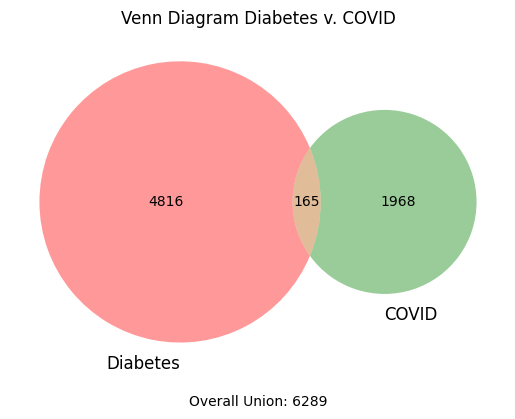

In [95]:
venn2(subsets=(len(diabetes_pts['Patient ID'] - intersection_pts['Patient ID']), len(covid_pts['Patient ID'] - intersection_pts['Patient ID']), len(intersection_pts['Patient ID'])),set_labels = ('Diabetes','COVID'))

plt.title('Venn Diagram Diabetes v. COVID')

# Annotate the overall union
plt.annotate(f'Overall Union: {len(union_pts)}', xy=(0.5, -0.1), xycoords='axes fraction', ha='center')

plt.show()

#### Question 6
Diabetes only after COVID Set (30 points)
a. Now including the date of diagnosis, find all patients with Diabetes only after they had COVID by listing their patient IDs.
b. Find the cardinality of the Diabetes only after COVID set.
c. Provide a count breakdown for each of the diabetes codes listed above occurring only after COVID.

In [102]:
# Part A
df.head()

,Unnamed: 0,Patient ID,Diagnosis Code,Date
0,0,4725559.0,E03.9,2020-09-20
1,1,7637008.0,R53.1,2019-10-27
2,2,5068050.0,I48.1,2020-11-22
3,3,1342235.0,E11.9,2022-01-27
4,4,4520230.0,N39.0,2020-05-17


In [122]:
# Part A
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter for patients with COVID or Diabetes
filtered_df = df[df['Patient ID'].isin(intersection_pts['Patient ID'])]

# Group by ID and find the earliest diagnosis date for COVID and Diabetes
grouped = filtered_df.groupby(['Patient ID', 'Diagnosis Code'])['Date'].min().unstack()
grouped['COVID'] = grouped[covid_codes].min(axis=1)
grouped['Diabetes'] = grouped[diabetes_codes].min(axis=1)

# Find patients with Diabetes only after COVID
patients_with_diabetes_after_covid = grouped[(grouped['Diabetes'] > grouped['COVID']) & pd.notnull(grouped['COVID'])].index

# Filter the original df for filtered patients and their diabetes diagnoses
diabetes_after_covid_df = filtered_df[(filtered_df['Patient ID'].isin(patients_with_diabetes_after_covid)) & (filtered_df['Diagnosis Code'].isin(diabetes_codes))]

diabetes_after_covid_df['Patient ID']

605      2465811.0
689      7542154.0
2066     2299370.0
2983      138575.0
3157      222248.0
           ...    
36793    4859240.0
39022    2646629.0
39390    4908235.0
40055     626112.0
40059    4322839.0
Name: Patient ID, Length: 70, dtype: float64

In [123]:
# Part B
diabetes_after_covid_df['Patient ID'].count()

70

In [125]:
# Part C
diabetes_after_covid_df['Diagnosis Code'].value_counts()

Diagnosis Code
E11    17
E13    16
E10    16
E08    13
E09     8
Name: count, dtype: int64